### Hindistan Delhi iklim tahmini

In [100]:
# csv dosyasını oku
# date sutununu konrol et
# date sutununu datetime veri tipine dönüştür
# date sutununu index kolonu haline getir
# eksik değerleri doldur
# decomposition verilerini kontrol et
# korelasyonu kontrol et
# durağan olup olmadığını kontrol et
# otokorelasyonuna bak
# modellemeye geç

In [101]:
import pandas as pd
df = pd.read_csv("DailyDelhiClimateTrain.csv", parse_dates=["date"],index_col="date").asfreq("D")
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [102]:
# eksik veri kontrolü

df.isnull().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Freq: D
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


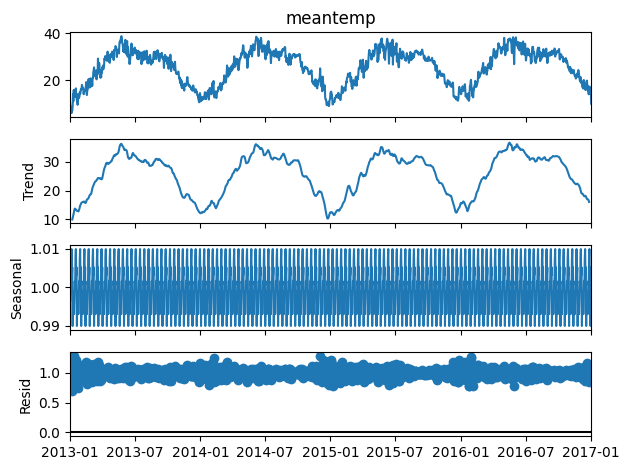

In [104]:
from statsmodels.tsa.seasonal import seasonal_decompose
dec_df = seasonal_decompose(df["meantemp"], model="mull", period=12)
dec_plot = dec_df.plot()

              meantemp  humidity  wind_speed  meanpressure
meantemp      1.000000 -0.576162    0.372731     -0.869542
humidity     -0.576162  1.000000   -0.420774      0.309705
wind_speed    0.372731 -0.420774    1.000000     -0.342559
meanpressure -0.869542  0.309705   -0.342559      1.000000


<Axes: >

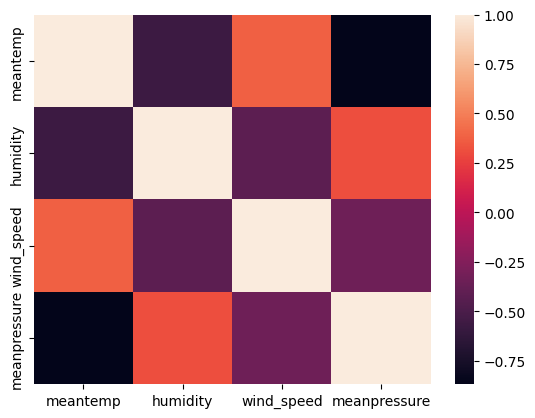

In [105]:
# import pandas as pd
# df = pd.read_csv("DailyDelhiClimateTest.csv")
corr_table = df[["meantemp", "humidity", "wind_speed", "meanpressure"]].corr(method='spearman')
print(corr_table)

import seaborn as sns
sns.heatmap(corr_table)  		

In [106]:
# durağan testi p_value 0.05 den büyükse durağan değildir

from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df["meantemp"])
#print(adf_test)
p_value = adf_test[1]
print(p_value)

0.2774121372301609


In [107]:
# durağan hale getirme
# df1 adlı değişken anımladım

df1 = df.diff().dropna()

# kontol etme
adf_test = adfuller(df1["meantemp"])
p_value = adf_test[1]
print(p_value)

# bir kere diff işleminden sonra durağan hale geliyor

2.764863137594527e-29


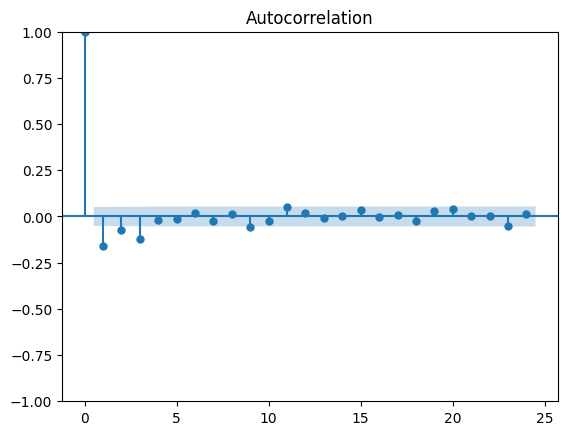

In [108]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plot_acf(df1["meantemp"], lags=24)

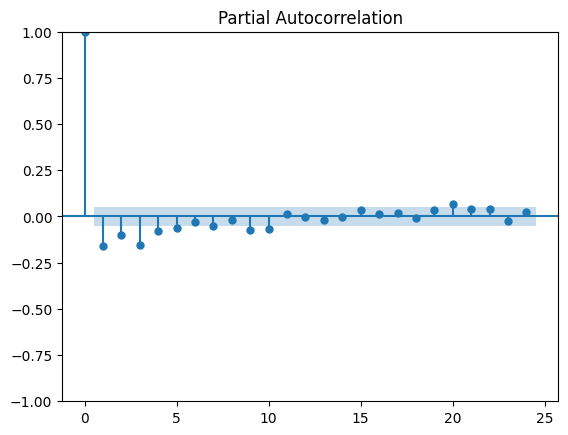

In [109]:
# df1 in pacf grafiğine baktım

fig = plot_pacf(df1["meantemp"], lags=24)

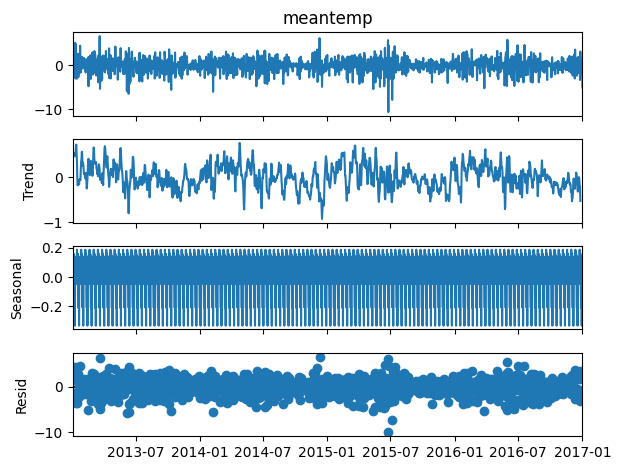

In [110]:
# df1 in acf grafiğine baktım

from statsmodels.tsa.seasonal import seasonal_decompose
dec_df = seasonal_decompose(df1["meantemp"], model="add", period=12)
dec_plot = dec_df.plot()

In [111]:
# df veri setimi böldüm

train, test = df[:-40], df[-40:]

In [112]:
# auto hiperparametre bul

import pmdarima as pm
model = pm.auto_arima(train["meantemp"],
                      seasonal=True, m=12,
                      d=1, 
                      D=1,
                 	  max_p=2, max_q=2,
                      max_P=2, max_Q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=3.69 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6377.301, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5965.038, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.80 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=6336.545, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5798.367, Time=0.50 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.00 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.84 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5827.061, Time=0.37 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=5783.904, Time=0.81 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=5949.060, Time=0.41 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=4.16 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.60 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=5685.975, Time=1.86 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=5846.1

In [113]:
# Modelin özetini al
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                 1422
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood               -2837.200
Date:                             Sun, 17 Mar 2024   AIC                           5684.399
Time:                                     22:23:55   BIC                           5710.653
Sample:                                 01-01-2013   HQIC                          5694.210
                                      - 11-22-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6562      0.031     21.364      0.000       0.596       0.716
ma.L1         -0.9069      

In [114]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train["meantemp"], order=(1,1,1), seasonal_order=(2,1,1,12), trend="c")

# Modeli eğit              
model_fit = model.fit()

# Tahminleri yap
fitted = model_fit.predict()

# hata payını al
resids = model_fit.resid

# tahminleri train içine ekleyin

train.loc[:,"fitted"] = fitted

C:\Users\mahsu\AppData\Local\Temp\ipykernel_15728\2919610600.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:,"fitted"] = fitted


In [115]:
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           meantemp   No. Observations:                 1422
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -2693.851
Date:                            Sun, 17 Mar 2024   AIC                           5401.701
Time:                                    22:24:15   BIC                           5438.456
Sample:                                01-01-2013   HQIC                          5415.437
                                     - 11-22-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0003      0.000     -1.102      0.270      -0.001       0.000
ar.L1          0.5910      0.046   

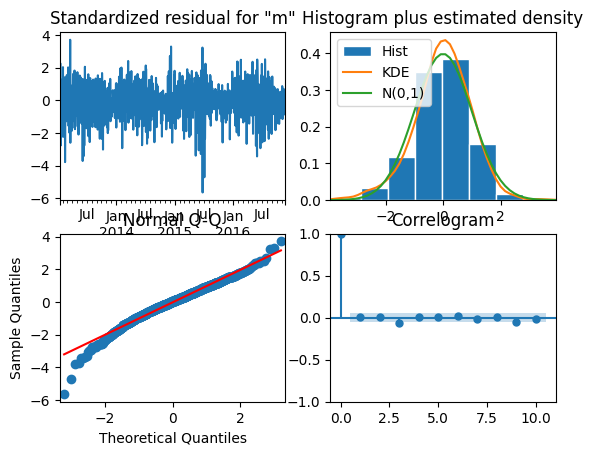

In [116]:
diags = model_fit.plot_diagnostics()

<Axes: xlabel='date'>

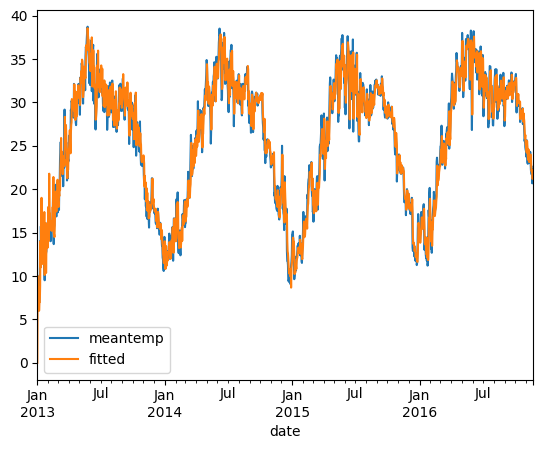

In [117]:
train[["meantemp", "fitted"]].plot()

### Test Verisi

In [118]:
# test verilerinin tahminini yap

test_predicted = model_fit.forecast(steps=len(test))  

<Axes: xlabel='date'>

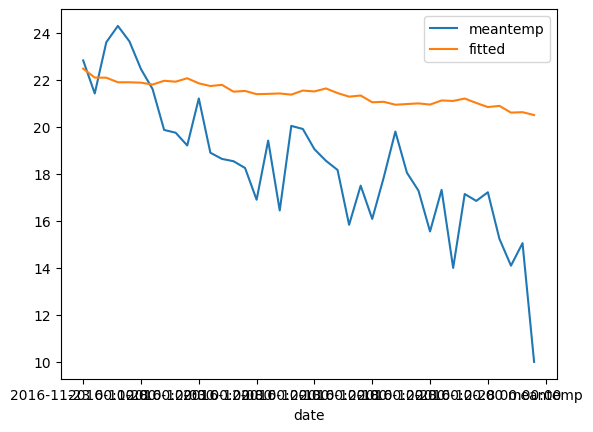

In [127]:
# test.loc[:, "fitted"] = test_predicted
test[["meantemp", "fitted"]].plot()

### Train ile test verilerini karşılaştır ve overfitting kontrolü yap

In [131]:
# train verisi için; 
print("---train verisi---")
import numpy as np
mae = np.mean(np.abs(resids.values))
mse = np.mean(np.square(resids.values))
rmse = np.sqrt(np.mean(np.square(resids.values)))
print("mae:", mae)
print("mse:", mse)
print("rmse:", rmse)

print()

# test verisi için;
print("---test verisi---")
mae = np.mean(np.abs(test["meantemp"]-test_predicted))
mse = np.mean(np.square(test["meantemp"]-test_predicted))
rmse = np.sqrt(np.mean(np.square(test["meantemp"]-test_predicted)))
print("mae:", mae)
print("mse:", mse)
print("rmse:", rmse)

---train verisi---
mae: 1.2661097483294546
mse: 2.828361131297737
rmse: 1.6817732104233725

---test verisi---
mae: 3.3070569041544027
mse: 15.160444033203571
rmse: 3.893641487502871


### Train verisi test verisinden daha küçük olduğu için overfitting yoktur.